In [74]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
state = np.random.RandomState(12345)

# ЗАДАЧА:
Мы немного поменяли интерфейс интернет-магазина для части пользователей. Нужно проверить, изменился ли средний чек покупки.  (Предполагается, что пользователей группы А и группы B выбирали случайным образом.)

In [53]:
alpha = 0.05 # зададим уровень значимости (единый для всех методов)

Сразу следует отметить, что такое P-value.
- Нулевая гипотеза предполагает, что средние двух выборок одинаковые (то, что метод mean() нам говорит об обратном нам не важно, согласно ЦПТ считается, что средние подвыборок стремятся к нормальному распределению вокруг истинного среднего, т.е. это просто одно из отклонений)
- P-value показывает вероятность получить такое или более экстремальное значение, т.е. разницу средних из двух случайных выборок.

In [54]:
# данные контрольной группы A
samples_A = pd.Series([
     98.24,  97.77,  95.56,  99.49, 101.4 , 105.35,  95.83,  93.02,
    101.37,  95.66,  98.34, 100.75, 104.93,  97.  ,  95.46, 100.03,
    102.34,  98.23,  97.05,  97.76,  98.63,  98.82,  99.51,  99.31,
     98.58,  96.84,  93.71, 101.38, 100.6 , 103.68, 104.78, 101.51,
    100.89, 102.27,  99.87,  94.83,  95.95, 105.2 ,  97.  ,  95.54,
     98.38,  99.81, 103.34, 101.14, 102.19,  94.77,  94.74,  99.56,
    102.  , 100.95, 102.19, 103.75, 103.65,  95.07, 103.53, 100.42,
     98.09,  94.86, 101.47, 103.07, 100.15, 100.32, 100.89, 101.23,
     95.95, 103.69, 100.09,  96.28,  96.11,  97.63,  99.45, 100.81,
    102.18,  94.92,  98.89, 101.48, 101.29,  94.43, 101.55,  95.85,
    100.16,  97.49, 105.17, 104.83, 101.9 , 100.56, 104.91,  94.17,
    103.48, 100.55, 102.66, 100.62,  96.93, 102.67, 101.27,  98.56,
    102.41, 100.69,  99.67, 100.99])
# данные экспериментальной группы B
samples_B = pd.Series([
    101.67, 102.27,  97.01, 103.46, 100.76, 101.19,  99.11,  97.59,
    101.01, 101.45,  94.8 , 101.55,  96.38,  99.03, 102.83,  97.32,
     98.25,  97.17, 101.1 , 102.57, 104.59, 105.63,  98.93, 103.87,
     98.48, 101.14, 102.24,  98.55, 105.61, 100.06,  99.  , 102.53,
    101.56, 102.68, 103.26,  96.62,  99.48, 107.6 ,  99.87, 103.58,
    105.05, 105.69,  94.52,  99.51,  99.81,  99.44,  97.35, 102.97,
     99.77,  99.59, 102.12, 104.29,  98.31,  98.83,  96.83,  99.2 ,
     97.88, 102.34, 102.04,  99.88,  99.69, 103.43, 100.71,  92.71,
     99.99,  99.39,  99.19,  99.29, 100.34, 101.08, 100.29,  93.83,
    103.63,  98.88, 105.36, 101.82, 100.86, 100.75,  99.4 ,  95.37,
    107.96,  97.69, 102.17,  99.41,  98.97,  97.96,  98.31,  97.09,
    103.92, 100.98, 102.76,  98.24,  97.  ,  98.99, 103.54,  99.72,
    101.62, 100.62, 102.79, 104.19])

### С помощью пакета Scipy stats.ttest
Самый легкий способ, которым и есть смысл пользоваться
- Следует отметить, что здесь мы получаем двухстороннюю вероятность, т.е. экстремальные значения могут быть как отрицательные, так и положительные. 
- Если бы мы делали одностороннюю проверку, то полученное значение надо бы было разделить на два. При этом, и уровень alpha надо было бы уменьшить в два раза.
- ??? Важно отметить, что средние должны иметь распределение Стьюдента. Обычно это так и есть (в случае нормальноего распределения)

In [55]:
t, pvalue = stats.ttest_ind(samples_A, samples_B) #считаем, что дисперсии выборок одинаковые equal_var = True
pvalue

0.06891039185573565

In [56]:
if pvalue > alpha: # т.е. вероятность получить abs(samples_A, samples_B) случайным способом
                   #больше установленного нами порога
    print("Не получилось отвергнуть нулевую гипотезу: скорее всего, средний чек не увеличился")
else:
    print("Отвергаем нулевую гипотезу: скорее всего, средний чек увеличился")

Не получилось отвергнуть нулевую гипотезу: скорее всего, средний чек не увеличился


Отметим, что с вероятностью 6.9% мы можем получить такую же или более существенною разницу средних делая подвыборки из Генеральной совокупности с данными характеристиками (t-критерий, дисперсия). 

### С помощью stats.t.cdf (кумулятивного распределения Стьюдента)

В классической статистике, рассчитав t-критерий Стюдента и количество степеней свободы, с помощью специальной таблицы, можно найти pvalue. В нашем случае, роль этой таблицы будет выполнять метод stats.t.cdf

In [61]:
# считаем среднее стандартное отклонение по двум выборкам
s = np.sqrt( (samples_A.var(ddof=1) + samples_B.var(ddof=1)) / 2 )
s

2.969996248679739

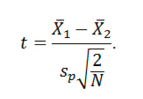

In [63]:
#считаем t-критерий Стьюдента, где N - размер одной из выборок (в случае равных выборок)
t = (samples_A.mean() - samples_B.mean()) / (s * np.sqrt(2.0/len(samples_A)))
t

-1.8289566175344534

In [65]:
# количество степеней свободы
df = 2*(len(samples_A)) - 2
df

198

In [67]:
# находим p-значение:
pvalueT = 2*(1 - stats.t.cdf(np.abs(t), df=df)) # фактически, мы считаем вероятность интервала справа, 
#потом умножаем его на 2.
pvalueT

0.06891039185573566

In [68]:
if pvalueT > alpha:
    print("Не получилось отвергнуть нулевую гипотезу: скорее всего, средний чек не увеличился")
else:
    print("Отвергаем нулевую гипотезу: скорее всего, средний чек увеличился")

Не получилось отвергнуть нулевую гипотезу: скорее всего, средний чек не увеличился


### Bootstrap
Смысл метода в том, что мы считает разницу между средними двух выборок. Затем объединяем выборки в одну, перемешиваем значения, снова разбиваем на две выборки и считаем разницу средних (B-A). Если разница больше изначальной(смотрим по модулю), то отмечаем этот факт. В конце эксперимента делим количество таких превышений на число экспериментов - это и будет наша p-value

In [57]:
# посчитаем фактическую разность средних значений в группах
AB_difference = samples_B.mean() - samples_A.mean()
AB_difference

0.7682000000000357

In [58]:
# зададим число экспериментов
bootstrap_samples = 10000
#объединим выборки
united_samples = pd.concat([samples_A, samples_B]) 

In [69]:
count = 0
bootstrap =[]
for i in range(bootstrap_samples):
    subsample = united_samples.sample(n=len(united_samples), replace=True, random_state=state)
    subsample_A = subsample[:len(samples_A)]
    subsample_B = subsample[len(samples_A):]
    # разница средних
    bootstrap_difference = subsample_B.mean() - subsample_A.mean()
    bootstrap.append(bootstrap_difference)
    if abs(bootstrap_difference) >= AB_difference:
        count += 1
# p-value равно доле превышений значений
pvalueBS = count / bootstrap_samples
pvalueBS

0.0675

In [70]:
# Если случаев, когда bootstrap_difference >= AB_difference действительно много, мы понимаем, что с большой вероятностью,
# разность объясняется свойствами выборки, а не действительным ростом среднего чека
if pvalueBS > alpha:
    print("Не получилось отвергнуть нулевую гипотезу: скорее всего, средний чек не увеличился")
else:
    print("Отвергаем нулевую гипотезу: скорее всего, средний чек увеличился")

Не получилось отвергнуть нулевую гипотезу: скорее всего, средний чек не увеличился


Хотелось отметить, что с помощью техники Bootstrap (фактически - метод Монте-Карло), мы получили абсолютно такое же значение P-value без специальных знаний.

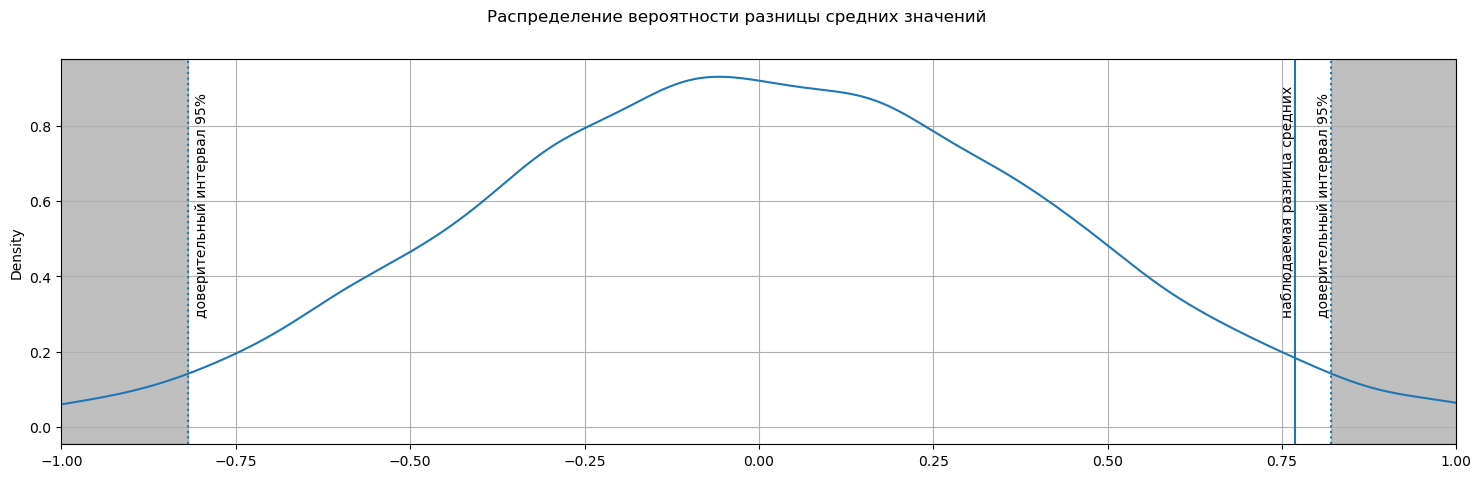

In [95]:
bootstrap = pd.Series(bootstrap)
fig, ax = plt.subplots(figsize=(18, 5))
bootstrap.plot(kind='kde', grid=True, ax=ax)
plt.axvline(bootstrap.quantile(0.025), linestyle='dotted')
plt.text(bootstrap.quantile(0.025)+0.01, 0.3, 'доверительный интервал 95%', rotation=90)

plt.axvline(bootstrap.quantile(0.975), linestyle='dotted')
plt.text(bootstrap.quantile(0.975)-0.02, 0.3, 'доверительный интервал 95%', rotation=90)
plt.suptitle('Распределение вероятности разницы средних значений')
plt.xlim(-1, 1)
plt.axvspan(-200, bootstrap.quantile(0.025), color='grey', alpha=0.5)
plt.axvspan(bootstrap.quantile(0.975),1000, color='grey', alpha=0.5)

plt.axvline(AB_difference)
plt.text(AB_difference-0.02, 0.3, 'наблюдаемая разница средних', rotation=90)

plt.show()

Графически решение можно представить таким образом:
- У нас есть распределение средних(==Стьюдента) и есть доверительный интервал 95% (от альфа = 0.05)
- Если наше среднее попадает в 95% значений доверительного интервала, значит считаем, что природа этого различия - случайность выборок, в нашем случае это так и есть.

# Размер выборки для непрерывной переменной

In [178]:
# размер выборки в Python
import statsmodels.stats.api as sms
es = (11-10)/3 # 11-10: какую разницу хотим обнаружить, 3- среднеквадратичное отклонение
sms.TTestIndPower().solve_power(es, power=0.8, alpha=0.05, ratio=1) # ratio - соотношение выборок, зададим равные

142.24625223287126

In [187]:
# по формуле Сравнение двух средних http://pubhealth.spb.ru/COPC/STATSH/ssize.htm
# n=(A+B)**2*2*SD**2/DIFF**2 
# где A, B коэффициенты, зависищие от уровня значимости и мощности. А: {5%: 1.96, 1% :2.58}
# В: {80%: 0.84, 90%: 1.28, 95%: 1.64}
(1.96+0.84)**2*2*3**2/(11-10)**2

141.11999999999998

In [194]:
# Интересно посмотреть по нашей выборке А, какое необходимо провести количество экспериментом, чтобы 
# статистически зафиксировать эффект (в %) разницы средних:
(samples_B.mean()-samples_A.mean())/samples_A.mean()*100

0.7704852592790578

In [196]:
es = (samples_B.mean()-samples_A.mean())/samples_A.std() 
sms.TTestIndPower().solve_power(es, power=0.8, alpha=0.05, ratio=1)

250.5027444557408

# Применимость t-теста:

Алгоритм
- Смотрим распределение данных (если нормальное = ок, распределение средних тоже будет нормальным/Стьюдента для малых выборок)
- Если нет, то бутстрепом смотрим распределение средних. Если нормальное = ок
- Если нет, используем тест mannwhitneyu (from scipy.stats import mannwhitneyu) - непараметрический тест, основан на рангах (Mann–Whitney–Wilcoxon (WMW))
- Альтетнатива 1, берем логарифм от данных (метод понижения дисперсии), логарифм -> параметрический критерий
- Альтьернатива 2 - бутстреп

In [202]:
len(samples_A)

100

Проверим нормальность распределения для samples_A:

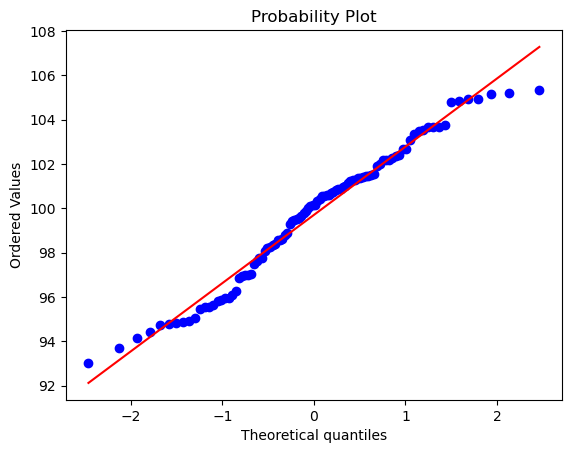

In [197]:
import pylab 
import scipy.stats as stats
   
stats.probplot(samples_A, dist="norm", plot=pylab)
pylab.show()

Видно, что распределение не очень то нормальное (возможно, просто мало данных). Попробуем через бутстреп создать множество выборок с размером 250 и посмотреть на распределение средних.

In [206]:
mean_distribution = pd.Series([samples_A.sample(n=250, replace=True, random_state=state).mean() for _ in range(10000)])

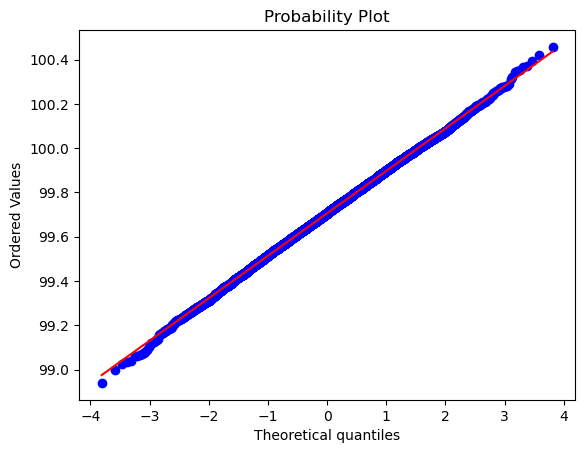

In [207]:
stats.probplot(mean_distribution, dist="norm", plot=pylab)
pylab.show()

Очевидно, что выброчные средние распределены нормально, t-test можно использовать.

# Бинарное распределение

### Задача
- Мы запустили новый лэндинг и хотим проверить его эффективность. Необходимо посчитать необходимый размер выборки при следующих допущениях:
- Statistical power = 80%, Significance level = 5%, convercion rate = 10%.
- Предположим, конверсия на лэндинге увеличилась до 13%. Какие выводы мы должны сделать?

Для бинарного распределения, размер выборки. Sample Size Calculator 
https://www.evanmiller.org/ab-testing/sample-size.html
- Мощность(Statistical power) - процент экспериментов, в которых мы сможем зафиксировать разницу при условии, что она действительно есть (при мощности = 0.8 в 20% случаев мы не сможем отвергнуть нулевую гипотезу при том, что что на самом деле разница будет). 1- Оши́бка второ́го ро́да.
- Alfha (Significance level) - процент экспериментов, которые покажут разницу при том, что на самом деле, ее не будет. Оши́бка пе́рвого ро́да, false positive.

#### Калькулятор просит для нас еще одно условие: Minimum Detectable Effect, т.е. какую минимальную разницу в показателях мы хотим обнаружить. Чем меньше разница, тем больше размер выборки. Предположим, мы задали разницу 5% (т.е. если новая конверсия будет в диапазоне 5-15%, то тест не покажет значимой разницы). Размер выборки при этом составит 599.

In [99]:
# размер выборки в Python
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.10, 0.15)
sms.NormalIndPower().solve_power(es, power=0.8, alpha=0.05, ratio=1) # ratio - соотношение выборок, зададим равные

680.3526619127882

Возьмем для надежности бОльший показатель выборки = 680

Посмотрим, как могли бы различаться выборки A и B и pvalue Т-теста при априори верной гипотезе от том, что выборки различаются (у А вероятность конверсии 10%, у B - 13%)

In [151]:
from scipy import stats as st

pvalues = []
for _ in range (10000):
    A = np.random.binomial(1, 0.10, 680)
    B = np.random.binomial(1, 0.13, 680)
    results = st.ttest_ind(A, B, equal_var = False)
    pvalues.append(results.pvalue)
(pd.Series(pvalues) > alpha).mean() # "Не получилось отвергнуть нулевую гипотезу"

0.5987

Как мы видим, в 60% случаев тест не видит разницы между двумя выборками при том, что она есть. И это справедливо: мы рассчитали размер выборки исходя из ожидаемого эффекта в 5%, а у фактически у нас было 3%. 

Перейдем теперь к нашей задаче и условием роста конверсии с 10% и 13% и неверно определенным размером выборки (680)

In [156]:
df = pd.DataFrame({'leads':[680, 680], 'conv':[0.1,0.13]}, index=['old', 'new'])
df['orders'] = df.leads * df.conv
df

,leads,conv,orders
old,680,0.10,68.0
new,680,0.13,88.4


In [157]:
from statsmodels.stats.proportion import proportions_ztest
leads = df.leads.values
orders = df.orders.values
proportions_ztest(orders, leads)[1]

0.08292441340950867

Запустив Z-test получаем pvalue 0.08. Это значит, что вероятность получить такию же или бОльшую разницу между случайными выборками составляет 8%. По этой причине мы не можем отвергнуть нулевую гипотезу о том, что среднее двух выборок не имееет различий.

#### Необходимо увеличить размеры выборок. Пускай теперь мы хотим обнаружить эффект +- 3%

In [161]:
es = sms.proportion_effectsize(0.10, 0.13)
sms.NormalIndPower().solve_power(es, power=0.8, alpha=0.05, ratio=1) # ratio - соотношение выборок, зададим равные
# если бы параметр был бы 1/3, то функция вернула бы размер основной выборки (А), а размер В надо было посчитать 
# умножив А х 1/3

1768.0950485742067

In [153]:
pvalues = []
for _ in range (10000):
    A = np.random.binomial(1, 0.10, 1768)
    B = np.random.binomial(1, 0.13, 1768)
    results = st.ttest_ind(A, B, equal_var = False)
    pvalues.append(results.pvalue)
(pd.Series(pvalues) > alpha).mean() # "Не получилось отвергнуть нулевую гипотезу"

0.2003

Теперь тест не видит разности в 20% случаев, при том, что она действительно есть. Собственно, это и есть наша заданная мощность (1-0.8 = 0.2)

In [213]:
pvalues = []
for _ in range (10000):
    A = np.random.binomial(1, 0.10, 1768)
    B = np.random.binomial(1, 0.10, 1768)
    results = st.ttest_ind(A, B, equal_var = False)
    pvalues.append(results.pvalue)
(pd.Series(pvalues) < alpha).mean() # "Отвергли нулевую гипотезу"

0.0479

Наш уровень alpha можно получить, проверяя заведомо равные выборки и оценивая процент случаев, в которых верная нулевая гипотеза будет отвергнута.

In [158]:
df = pd.DataFrame({'leads':[1768, 1768], 'conv':[0.1,0.13]}, index=['old', 'new'])
df['orders'] = df.leads * df.conv
df

,leads,conv,orders
old,1768,0.10,176.80
new,1768,0.13,229.84


In [159]:
leads = df.leads.values
orders = df.orders.values
proportions_ztest(orders, leads)[1]

0.005175005364252356

Здесь мы смело можем отвергнуть гипотезу о равенстве средних и заявить о том, что эффект роста конверсии с 10% до 13% имеет место быть. При этом, при данных объемах выборки, вероятность получить такую или большую разницу на случайных выборках составляет 0.5%